# Import libraries

In [1]:
%reload_ext autoreload
%autoreload 2
import os
import csv
import numpy as np
import function as func
import datetime
import matplotlib.pyplot as plt
# set colorful lines
cmap = plt.get_cmap('jet')
plt.rcParams['font.size'] = 15
np.set_printoptions(threshold=20)

# Setting

In [2]:
outdir = './output/timevariacion_dosue-j_300K'
if not os.path.isdir(outdir):
    os.mkdir(outdir)
    pass

In [3]:
datadir = '/data/ms2840a/2023-03-06_loop_300K'
nfile = 100
filename0 = '300K_SWEEP_SWEEP_'
nfile = 252
filenames = [ f'{datadir}/{filename0}{i}.dat' for i in range(nfile) ] if nfile > 1 else [ f'{filename}.dat' ]
binary = True
csvnames = [ f'{datadir}/{filename0}{i}.csv' for i in range(nfile) ] if nfile > 1 else [ f'{filename}.csv' ]
labels = [ f'{i}' for i in range(nfile) ]  if nfile > 1 else [ filename.split('/')[-1] ]
freq_min = 8*1e+9 # [Hz]
freq_max = 18*1e+9 # [Hz]
legendON = False

# binning
rbw = 1e+6
doRebin = False
rebinmethod = 0
binwidth = 1e+6

# average
nAve = 100

filenames = np.array(filenames)
csvnames = np.array(csvnames)
labels = np.array(labels)

In [4]:
func.print_list(filenames)
func.print_list(csvnames)
func.print_list(labels)

filenames (size=(252,)) = ['/data/ms2840a/2023-03-06_loop_300K/300K_SWEEP_SWEEP_0.dat'
 '/data/ms2840a/2023-03-06_loop_300K/300K_SWEEP_SWEEP_1.dat'
 '/data/ms2840a/2023-03-06_loop_300K/300K_SWEEP_SWEEP_2.dat' ...
 '/data/ms2840a/2023-03-06_loop_300K/300K_SWEEP_SWEEP_249.dat'
 '/data/ms2840a/2023-03-06_loop_300K/300K_SWEEP_SWEEP_250.dat'
 '/data/ms2840a/2023-03-06_loop_300K/300K_SWEEP_SWEEP_251.dat']
csvnames (size=(252,)) = ['/data/ms2840a/2023-03-06_loop_300K/300K_SWEEP_SWEEP_0.csv'
 '/data/ms2840a/2023-03-06_loop_300K/300K_SWEEP_SWEEP_1.csv'
 '/data/ms2840a/2023-03-06_loop_300K/300K_SWEEP_SWEEP_2.csv' ...
 '/data/ms2840a/2023-03-06_loop_300K/300K_SWEEP_SWEEP_249.csv'
 '/data/ms2840a/2023-03-06_loop_300K/300K_SWEEP_SWEEP_250.csv'
 '/data/ms2840a/2023-03-06_loop_300K/300K_SWEEP_SWEEP_251.csv']
labels (size=(252,)) = ['0' '1' '2' ... '249' '250' '251']


# Define funcition to calculate frequency average

In [5]:
def average(data, naverage=100):

    ndata = len(data)
    npoints = int(ndata/naverage)
    
    data_ave = []
    data_err = []
    
    for i in range(npoints):
        data_subset = data[i*naverage:(i+1)*naverage]
        average = np.mean(data_subset)
        average_err = np.std(data_subset)/np.sqrt(naverage) #  = 1/N * sqrt( sum((y-mean)^2))  ( std = sqrt( sum((y-mean)^2) / N) )
        data_ave.append(average)
        data_err.append(average_err)
        pass
    
    return np.array(data_ave), np.array(data_err)

# Define function to interpolate spectrum over frequency

In [6]:
# interp_kind = 'linear': linear interpolation
# interp_kind = 'cubic' : splineinterpolation
from scipy import interpolate
def freq_interpolate(freq, freq1, power1, interp_kind='cubic'):
    interp_func = interpolate.interp1d(freq1, power1, kind=interp_kind)
    return interp_func(freq)

# Read data
## Read RF data

In [7]:
freq_array = []
power_array = []
datetime_array = []
rbw_array = []
for filename, csvname in zip(filenames, csvnames):
    _freq, _power, _power_err = func.dat_to_array(f'{filename}', doRebin=doRebin, rebinmethod=rebinmethod, rbw=rbw, binwidth=binwidth, binary=binary)
    with open(csvname, 'r') as f:
        reader = csv.reader(f, delimiter=',', skipinitialspace=True)
        for row in reader:
            row0 = row[0]
            if row[0]=='start-time': datetime_array.append(datetime.datetime.strptime(row[1], '%Y-%m-%d-%H:%M:%S')) # datetime
            if row[0]=='RBW': rbw_array.append(float(row[1])) # Hz
            pass
    
    # Select data between freq_min and freq_max
    _power = _power[_freq<=freq_max]
    _freq = _freq[_freq<=freq_max]
    _power = _power[_freq>=freq_min]
    _freq = _freq[_freq>=freq_min]
    
    freq_array.append(_freq)
    power_array.append(_power)
    pass
freq_array = np.array(freq_array)
power_array = np.array(power_array)
datetime_array = np.array(datetime_array)
rbw_array = np.array(rbw_array)

In [8]:
func.print_list(freq_array)
func.print_list(power_array)
func.print_list(datetime_array)
func.print_list(rbw_array)

freq_array (size=(252, 10001)) = [[8.0000e+09 8.0010e+09 8.0020e+09 ... 1.7998e+10 1.7999e+10 1.8000e+10]
 [8.0000e+09 8.0010e+09 8.0020e+09 ... 1.7998e+10 1.7999e+10 1.8000e+10]
 [8.0000e+09 8.0010e+09 8.0020e+09 ... 1.7998e+10 1.7999e+10 1.8000e+10]
 ...
 [8.0000e+09 8.0010e+09 8.0020e+09 ... 1.7998e+10 1.7999e+10 1.8000e+10]
 [8.0000e+09 8.0010e+09 8.0020e+09 ... 1.7998e+10 1.7999e+10 1.8000e+10]
 [8.0000e+09 8.0010e+09 8.0020e+09 ... 1.7998e+10 1.7999e+10 1.8000e+10]]
power_array (size=(252, 10001)) = [[5.95113549e-09 6.28637256e-09 6.30376244e-09 ... 1.99342471e-09
  2.19078532e-09 2.00493358e-09]
 [6.17305118e-09 6.38263374e-09 6.32557717e-09 ... 1.97333113e-09
  2.11982519e-09 2.13697791e-09]
 [6.63743257e-09 6.45951809e-09 6.78578647e-09 ... 1.96788567e-09
  2.05731097e-09 2.01557922e-09]
 ...
 [5.64416737e-09 6.13196892e-09 6.36355607e-09 ... 1.98792555e-09
  2.15129499e-09 2.07730336e-09]
 [6.43131851e-09 6.06456858e-09 6.32994584e-09 ... 1.96834032e-09
  2.09700739e-09 2.081

## Averaging data

In [9]:
freq_ave_array = []
power_ave_array = []
powererr_ave_array = []
for freq, power in zip(freq_array, power_array):
    freq_ave, tmp = average(freq, nAve)
    power_ave, powererr_ave = average(power, nAve)
    freq_ave_array.append( freq_ave )
    power_ave_array.append( power_ave )
    powererr_ave_array.append( powererr_ave )
    pass

freq_ave_array = np.array( freq_ave_array )
power_ave_array = np.array( power_ave_array )
powererr_ave_array = np.array( powererr_ave_array )

func.print_list(freq_ave_array)
func.print_list(power_ave_array)
func.print_list(powererr_ave_array)

freq_ave_array (size=(252, 100)) = [[8.04950e+09 8.14950e+09 8.24950e+09 ... 1.77495e+10 1.78495e+10
  1.79495e+10]
 [8.04950e+09 8.14950e+09 8.24950e+09 ... 1.77495e+10 1.78495e+10
  1.79495e+10]
 [8.04950e+09 8.14950e+09 8.24950e+09 ... 1.77495e+10 1.78495e+10
  1.79495e+10]
 ...
 [8.04950e+09 8.14950e+09 8.24950e+09 ... 1.77495e+10 1.78495e+10
  1.79495e+10]
 [8.04950e+09 8.14950e+09 8.24950e+09 ... 1.77495e+10 1.78495e+10
  1.79495e+10]
 [8.04950e+09 8.14950e+09 8.24950e+09 ... 1.77495e+10 1.78495e+10
  1.79495e+10]]
power_ave_array (size=(252, 100)) = [[6.03877533e-09 5.89951492e-09 5.69602467e-09 ... 2.01120976e-09
  1.99556303e-09 2.04662032e-09]
 [6.03888860e-09 5.88127693e-09 5.65827487e-09 ... 1.98344388e-09
  1.98602706e-09 2.04634074e-09]
 [6.01492632e-09 5.85781197e-09 5.76854636e-09 ... 1.99411371e-09
  1.96921863e-09 2.03504494e-09]
 ...
 [6.02534267e-09 5.87781159e-09 5.71343802e-09 ... 1.99732489e-09
  1.97798282e-09 2.03124179e-09]
 [6.01930813e-09 5.87322728e-09 5.74

## Read room temperature & humidity data

In [10]:
tempfile = '/data/usbrh/data_2023-03-07.dat'

temp_time = []
temp = []
humid = []
with open(tempfile, 'r') as f:
    reader = csv.reader(f, delimiter=' ', skipinitialspace=True)
    for row in reader:
        if row[0][0]=='#': continue
        temp_time.append( datetime.datetime.fromtimestamp(int(row[0])) )
        temp.append( float(row[3]) )
        humid.append( float(row[4]) )
        pass
    pass

temp_time = np.array(temp_time)
temp = np.array(temp)
humid = np.array(humid)

In [11]:
# Select data in time range
time_pass = np.where( (temp_time >= datetime_array[0]) & (temp_time <= datetime_array[-1]) )
temp_time = temp_time[time_pass]
temp = temp[time_pass]
humid = humid[time_pass]

In [12]:
func.print_list(temp_time)
func.print_list(temp)
func.print_list(humid)

temp_time (size=(2070,)) = [datetime.datetime(2023, 3, 7, 2, 18, 24)
 datetime.datetime(2023, 3, 7, 2, 18, 35)
 datetime.datetime(2023, 3, 7, 2, 18, 46) ...
 datetime.datetime(2023, 3, 7, 8, 43, 56)
 datetime.datetime(2023, 3, 7, 8, 44, 7)
 datetime.datetime(2023, 3, 7, 8, 44, 18)]
temp (size=(2070,)) = [14.58 14.59 14.58 ... 14.43 14.43 14.47]
humid (size=(2070,)) = [36.13 36.13 36.16 ... 35.87 35.91 35.87]


#  Plotting

##  Plot Power [W]

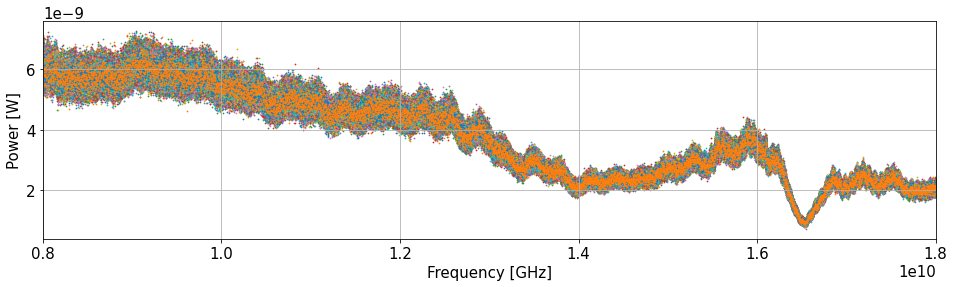

In [13]:
fig = plt.figure(figsize=(16,4))
for i, filename in enumerate(filenames):
    plt.scatter(freq_array[i], power_array[i], label=f'{i}', marker='o', s=3, linewidth=0.)
    pass
plt.xlabel('Frequency [GHz]') #x軸の名前
plt.ylabel('Power [W]') #y軸の名前
plt.xlim(freq_min,freq_max) #x軸範囲指定
#plt.xlim(5,20) #x軸範囲指定
#plt.ylim(0,0.02) #y軸範囲指定
#plt.ylim(0,0.003) #y軸範囲指定
plt.grid(True)

if legendON: plt.legend()

plt.savefig(f'{outdir}/power_W.png')
plt.show()

##  Plot Averaging Power [W]

power_timeave (size=(100,)) = [6.02006563e-09 5.86144327e-09 5.71306001e-09 ... 1.99984045e-09
 1.98473936e-09 2.04662672e-09]


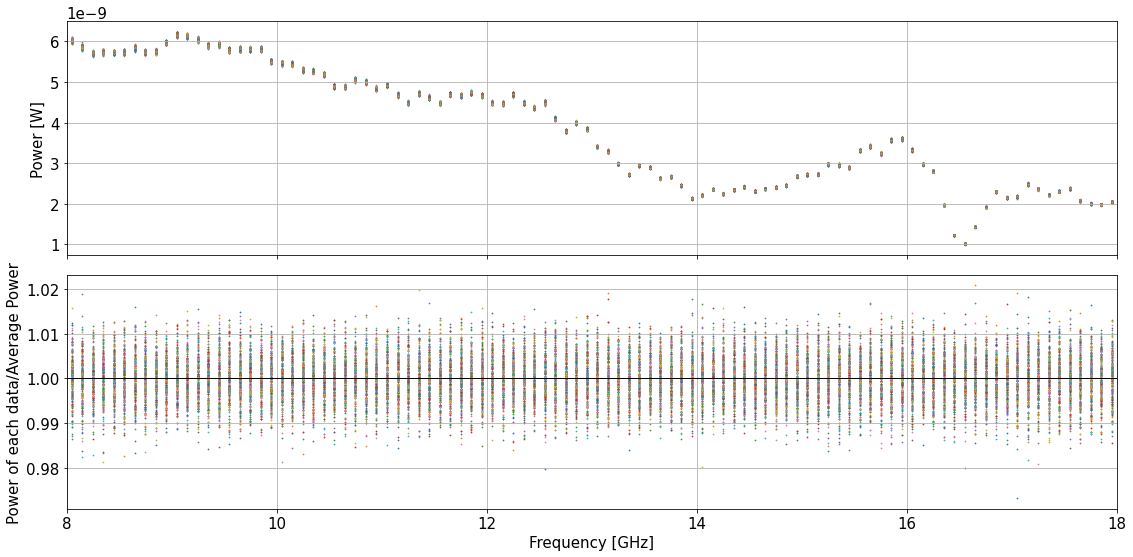

In [33]:
fig, axes = plt.subplots(2, 1, figsize=(16,8), sharex=True, squeeze=False)
power_timeave = np.average(power_ave_array, axis=0)
func.print_list(power_timeave)

all_ratio = []
all_freq = []
for i, filename in enumerate(filenames):
    ax = axes[0][0]
    ax.scatter(freq_ave_array[i]*1e-9, power_ave_array[i], label=f'{i}', marker='o', s=3, linewidth=0.)
    #ax.set_xlabel('Frequency [GHz]') #x軸の名前
    ax.set_xlim([freq_min*1e-9, freq_max*1e-9])
    ax.set_ylabel('Power [W]') #y軸の名前
    ax.grid(True)
    if legendON: ax.set_legend()
    
    ax = axes[1][0]
    _ratio = power_ave_array[i]/power_timeave
    all_ratio.append(_ratio)
    all_freq.append(freq_ave_array[i])
    ax.scatter(freq_ave_array[i]*1e-9, _ratio, label=f'{i}', marker='o', s=3, linewidth=0.)
    ax.plot([freq_min*1e-9-1, freq_max*1e-9+1],[1,1], c='k', ls='-', lw=1)
    ax.set_xlim([freq_min*1e-9, freq_max*1e-9])
    ax.set_xlabel('Frequency [GHz]') #x軸の名前
    ax.set_ylabel('Power of each data/Average Power') #y軸の名前
    ax.grid(True)
    pass

fig.set_tight_layout(True)
fig.savefig(f'{outdir}/power_ave_W.png')
fig.show()

all_ratio = np.array(all_ratio)
all_freq = np.array(all_freq)

 std = 0.4931034615641873 %


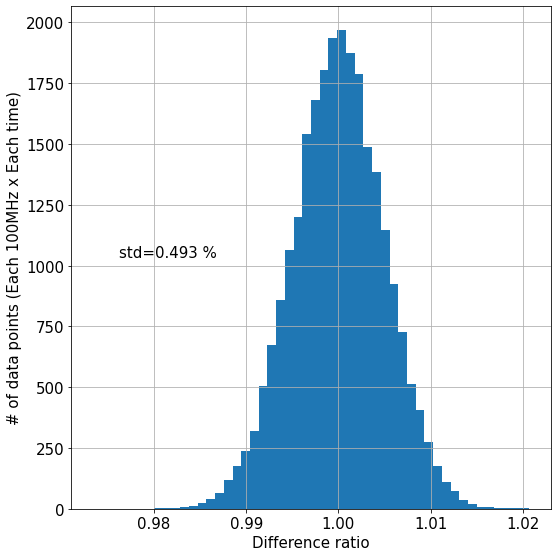

In [50]:
std = np.std( all_ratio.flatten() )
print(f' std = {std*100} %')

fig, axes = plt.subplots(1, 1, figsize=(8,8), sharex=True, squeeze=False)
ax = axes[0][0]
hist, bins, tmp = ax.hist(all_ratio.flatten(), bins=50)
ax.grid(True)
ax.set_xlabel('Difference ratio')
ax.set_ylabel('# of data points (Each 100MHz x Each time)')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.text(xlim[0]+np.diff(xlim)*0.1, np.mean(ylim), f'std={std*100:.3f} %')
fig.set_tight_layout(True)

fig.savefig(f'{outdir}/time_diff_histogram.png')

##  Time variation of power [W]

power_freqave (size=(252,)) = [3.83073748e-09 3.83556940e-09 3.83035023e-09 ... 3.83821671e-09
 3.84020872e-09 3.83608396e-09]


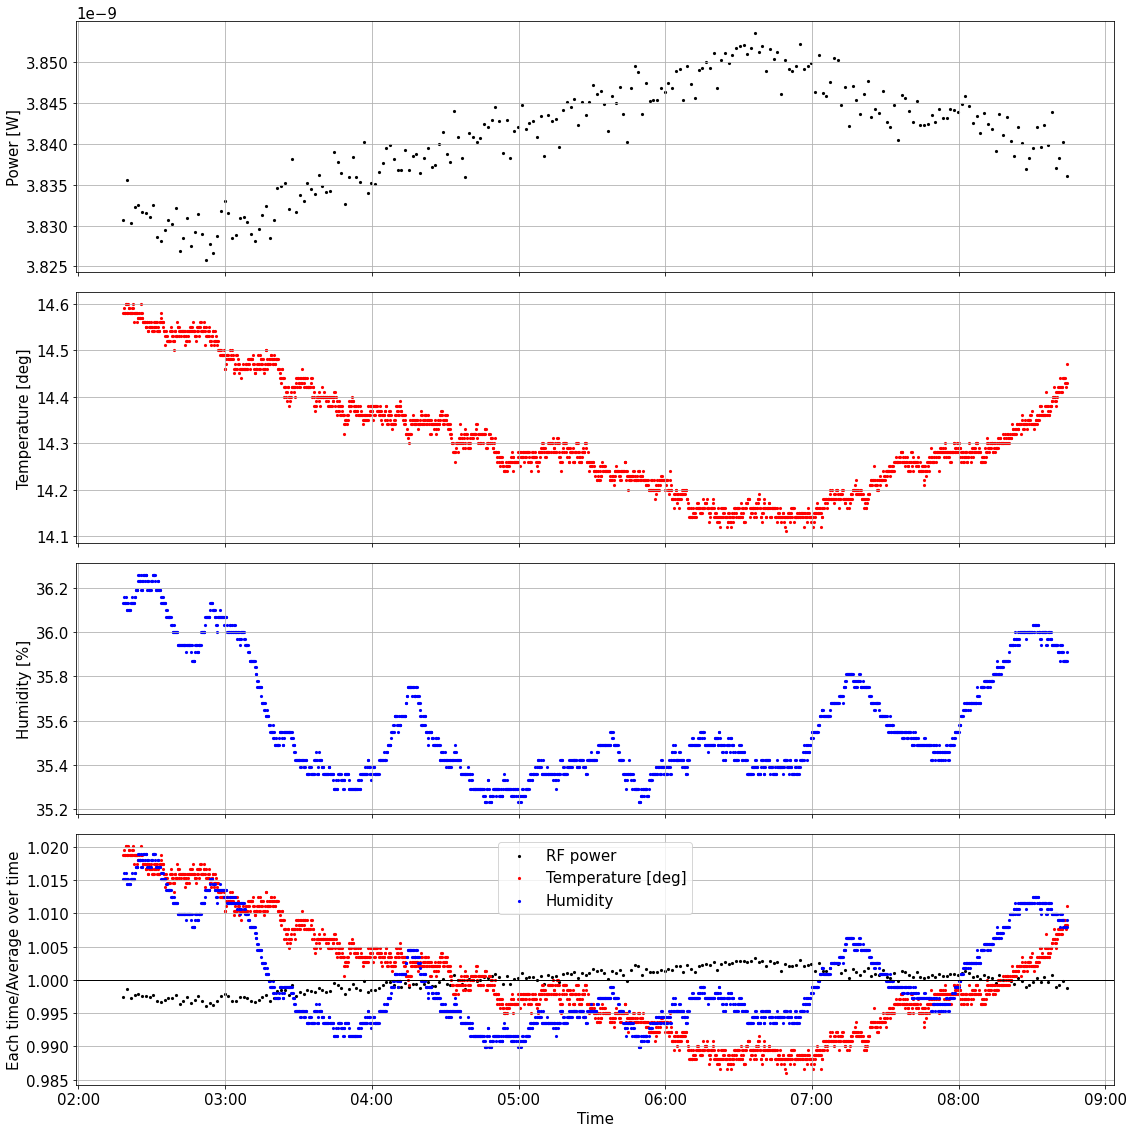

In [32]:
fig, axes = plt.subplots(4, 1, figsize=(16,16), sharex=True, squeeze=False)
power_freqave = np.average(power_ave_array, axis=1)
func.print_list(power_freqave)

total_ave = np.mean(power_freqave)
temp_ave = np.mean(temp)
humid_ave = np.mean(humid)

ax = axes[0][0]
ax.scatter(datetime_array, power_freqave, label=f'Average power of 8--18GHz', marker='o', s=10, linewidth=0., c='k')
ax.set_ylabel('Power [W]') #y軸の名前
ax.grid(True)
xlim = ax.get_xlim()
if legendON: ax.legend()

ax = axes[1][0]
ax.scatter(temp_time, temp, label=f'Room Temperature', marker='o', s=10, linewidth=0., c='r')
ax.set_ylabel('Temperature [deg]') #y軸の名前
ax.grid(True)
ax.set_xlim(xlim)

ax = axes[2][0]
ax.scatter(temp_time, humid, label=f'Humidity', marker='o', s=10, linewidth=0., c='b')
ax.set_ylabel('Humidity [%]') #y軸の名前
ax.grid(True)
ax.set_xlim(xlim)

ax = axes[3][0]
ax.scatter(datetime_array, power_freqave/total_ave, label=f'RF power', marker='o', s=10, linewidth=0., c='k')
ax.scatter(temp_time, temp/temp_ave, label=f'Temperature [deg]', marker='o', s=10, linewidth=0., c='r')
#ax.scatter(temp_time, (temp+273.)/(temp_ave+273.), label=f'Temperature [K]', marker='o', s=10, linewidth=0.)
ax.scatter(temp_time, humid/humid_ave, label=f'Humidity', marker='o', s=10, linewidth=0., c='b')
ax.plot([xlim[0]-1, xlim[1]+1],[1,1], c='k', ls='-', lw=1)
ax.set_xlim(xlim)
ax.set_xlabel('Time') #x軸の名前
ax.set_ylabel('Each time/Average over time') #y軸の名前
ax.grid(True)
ax.legend()
from matplotlib import dates
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))

fig.set_tight_layout(True)
fig.savefig(f'{outdir}/time_vs_power_ave_W.png')
fig.show()